### Libraries used in this project

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## 1- Dataset analysis and report on important statistics

   sample    x1  x2         x3   x4       x5       x6     x7       x8      x9  \
0       1  1353 NaN   1.142857   88  104.850  0.00727  0.443    7.997   6.990   
1       2  1107 NaN   4.857143  306  194.175  0.03778  0.363   34.002  12.945   
2       3   984 NaN   6.571429  368  208.575  0.05750  0.356   46.000  13.905   
3       4  1107 NaN   4.714286  297  175.725  0.03667  0.354   33.003  11.715   
4       5   123 NaN  33.571429  235  225.000  2.35000  0.923  235.000  15.000   

       x10   x11       x12   x13 x14     y  
0  8346.00   3.9  0.032695  0.05  C1   Low  
1   376.64  11.1  0.210526  3.15  C3   Low  
2   451.54  13.1  0.271930  3.10  C1   Low  
3   393.76  10.5  0.185008  2.85  C1   Low  
4  5805.82  21.7  0.187400  0.40  C4  High   

Description of numerical training data:
            sample            x1          x2           x3             x4  \
count  1000.000000   1000.000000  102.000000  1000.000000    1000.000000   
mean    500.500000   1867.632000    0.501471    1

C:\Users\hayde\AppData\Local\Temp\ipykernel_22960\1917542738.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='x14', order=x14_counts.index, palette='viridis')


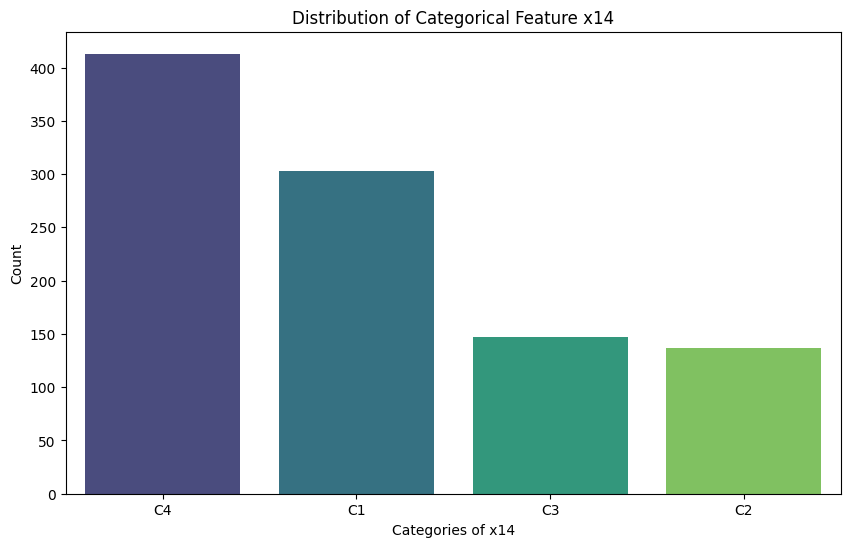


Class distribution in training data:



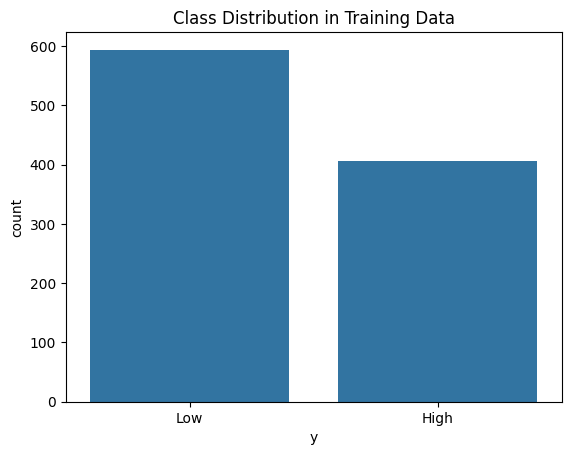

In [96]:
# Load the datasets
train_data = pd.read_csv('Dataset-train-vf.csv')
test_data = pd.read_csv('Dataset-test-vf.csv')

print(train_data.head(), '\n')

# Basic statistics for numerical training data
print("Description of numerical training data:")
print(train_data.describe())
print(train_data['y'].value_counts(), '\n')

# Basic statistics for categorical training data
print("\nUnique values in x14:", train_data['x14'].unique())

# Count the occurrences of each category in x14
x14_counts = train_data['x14'].value_counts()
print("Counts for each category in x14:\n", x14_counts)

# Plot the distribution of the categorical feature x14
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='x14', order=x14_counts.index, palette='viridis')
plt.title('Distribution of Categorical Feature x14')
plt.xlabel('Categories of x14')
plt.ylabel('Count')
plt.show()

# Visualize class distribution for training data
print("\nClass distribution in training data:\n")
sns.countplot(x='y', data=train_data)
plt.title('Class Distribution in Training Data')
plt.show()



## 2- Feature selection/transformation/engineering

In [97]:
# Initialize label encoder
label_encoder = LabelEncoder()

# One-hot encode the categorical feature x14
encoded_train_data = pd.get_dummies(train_data, columns=['x14'], drop_first=True)  # Avoid dummy variable trap
encoded_test_data = pd.get_dummies(test_data, columns=['x14'], drop_first=True)

# Encode the target variable
encoded_train_data["y"]=encoded_train_data["y"].map(lambda x: 1 if x=="High" else 0)
encoded_test_data["y"]=encoded_test_data["y"].map(lambda x: 1 if x=="High" else 0)

# Drop the sample column
encoded_train_data = encoded_train_data.drop(columns=['sample'])
encoded_test_data = encoded_test_data.drop(columns=['sample']) 

# Inspect the new columns
print("\nSample of data after transformation:\n",encoded_train_data.head())
print("\ny = low --> 0")
print("y = high --> 1")


Sample of data after transformation:
      x1  x2         x3   x4       x5       x6     x7       x8      x9  \
0  1353 NaN   1.142857   88  104.850  0.00727  0.443    7.997   6.990   
1  1107 NaN   4.857143  306  194.175  0.03778  0.363   34.002  12.945   
2   984 NaN   6.571429  368  208.575  0.05750  0.356   46.000  13.905   
3  1107 NaN   4.714286  297  175.725  0.03667  0.354   33.003  11.715   
4   123 NaN  33.571429  235  225.000  2.35000  0.923  235.000  15.000   

       x10   x11       x12   x13  y  x14_C2  x14_C3  x14_C4  
0  8346.00   3.9  0.032695  0.05  0   False   False   False  
1   376.64  11.1  0.210526  3.15  0   False    True   False  
2   451.54  13.1  0.271930  3.10  0   False   False   False  
3   393.76  10.5  0.185008  2.85  0   False   False   False  
4  5805.82  21.7  0.187400  0.40  1   False   False    True  

y = low --> 0
y = high --> 1


In [98]:
missing_train_values = encoded_train_data.isnull().sum()
print(f'percentage of messing in training set\n{missing_train_values*100/len(encoded_train_data)}')

missing_test_values = encoded_test_data.isnull().sum()
print(f'\npercentage of values messing in testing set\n{missing_test_values*100/len(encoded_test_data)}')



percentage of messing in training set
x1         0.0
x2        89.8
x3         0.0
x4         0.0
x5         0.0
x6        10.4
x7         0.0
x8         0.0
x9         0.0
x10        0.0
x11        0.0
x12        0.0
x13        0.0
y          0.0
x14_C2     0.0
x14_C3     0.0
x14_C4     0.0
dtype: float64

percentage of values messing in testing set
x1         0.000000
x2        88.395062
x3         0.000000
x4         0.000000
x5         0.000000
x6         9.135802
x7         0.000000
x8         0.000000
x9         0.000000
x10        0.000000
x11        0.000000
x12        0.000000
x13        0.000000
y          0.000000
x14_C2     0.000000
x14_C3     0.000000
x14_C4     0.000000
dtype: float64


In [99]:
# Dropping feature[x2] and imputing missing values for feature[x6]
encoded_train_data = encoded_train_data.drop(columns=['x2'])
encoded_test_data = encoded_test_data.drop(columns=['x2'])

# Fill missing values in numerical features with the mean
encoded_train_data.fillna(encoded_train_data.mean(), inplace=True)
encoded_test_data.fillna(encoded_test_data.mean(), inplace=True)

missing_train_values = encoded_train_data.isnull().sum()
missing_test_values = encoded_test_data.isnull().sum()

print(f"\nmissing training values after imputing:\n{missing_train_values}\n")
print(f"\nmissing testing values after imputing:\n{missing_test_values}\n")


missing training values after imputing:
x1        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
x9        0
x10       0
x11       0
x12       0
x13       0
y         0
x14_C2    0
x14_C3    0
x14_C4    0
dtype: int64


missing testing values after imputing:
x1        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
x9        0
x10       0
x11       0
x12       0
x13       0
y         0
x14_C2    0
x14_C3    0
x14_C4    0
dtype: int64



In [100]:
scaler = StandardScaler()
encoded_train_data_normalized = encoded_train_data.copy()
encoded_test_data_normalized = encoded_test_data.copy()

numerical_features = encoded_train_data_normalized.select_dtypes(include=['float64', 'int64']).columns
encoded_train_data_normalized[numerical_features] = scaler.fit_transform(encoded_train_data_normalized[numerical_features])
encoded_test_data_normalized[numerical_features] = scaler.transform(encoded_test_data_normalized[numerical_features])

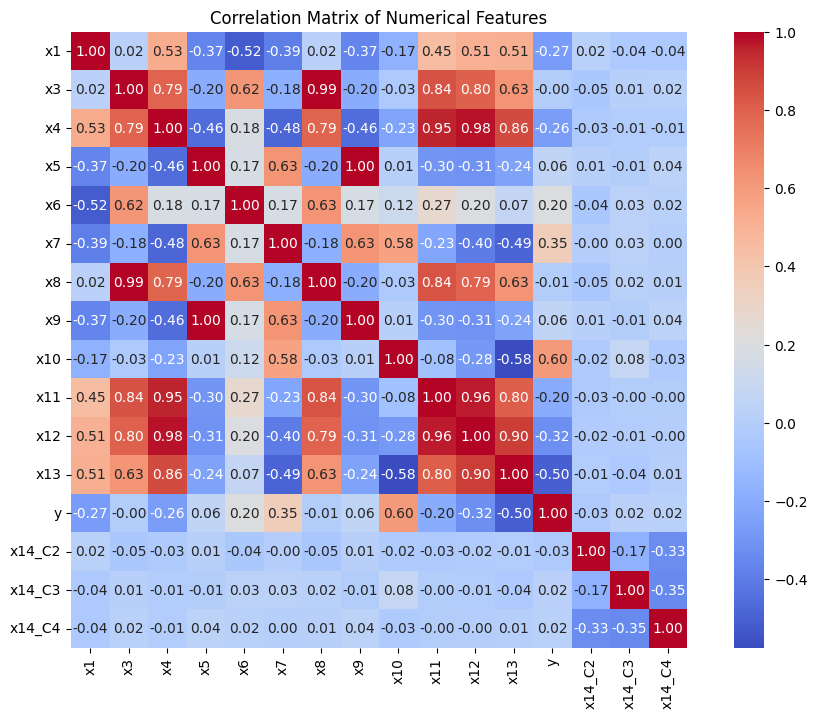

Correlation of features with encoded target variable:
 x1       -0.268946
x3       -0.003623
x4       -0.264796
x5        0.055897
x6        0.202361
x7        0.351542
x8       -0.005795
x9        0.055897
x10       0.603356
x11      -0.199991
x12      -0.324172
x13      -0.504328
x14_C2   -0.033294
x14_C3    0.024831
x14_C4    0.017875
Name: y, dtype: float64


In [101]:
# Correlation matrix for numerical features, including the encoded target
plt.figure(figsize=(12, 8))
correlation_matrix = encoded_train_data.corr(method='spearman')  # This will now include 'y_encoded'
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Correlation with the encoded target variable
correlation_with_target = correlation_matrix['y'].drop('y')  # Exclude the encoded target itself
print("Correlation of features with encoded target variable:\n", correlation_with_target)

Highly correlated features:
 x7     0.351542
x10    0.603356
x12   -0.324172
x13   -0.504328
Name: y, dtype: float64


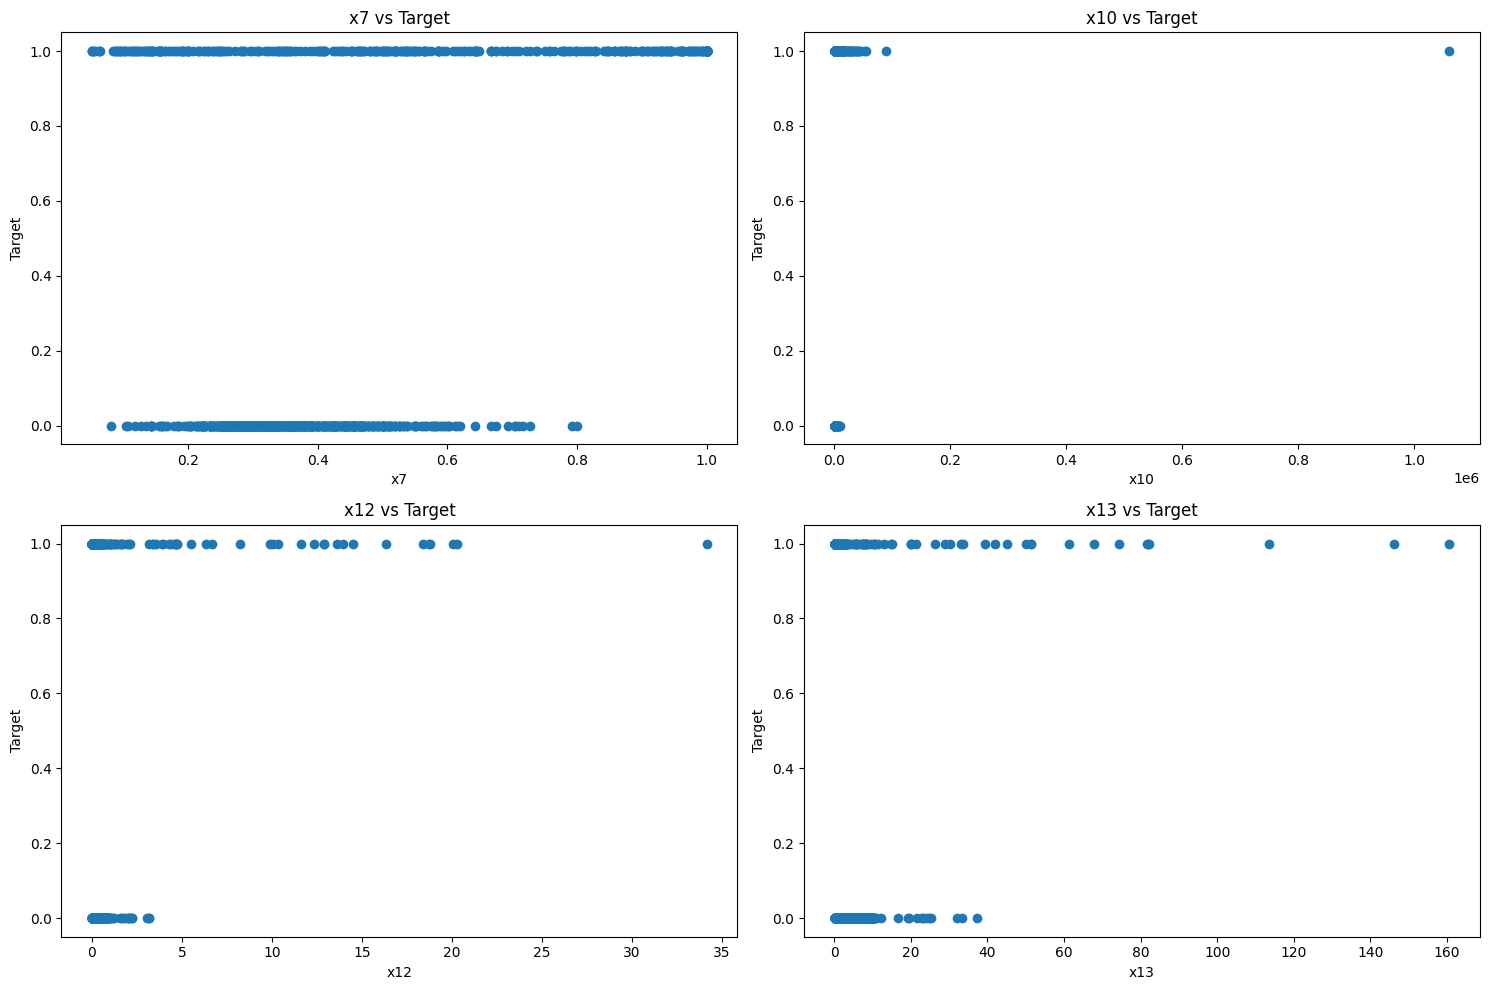

In [103]:
# Select features with correlation above a threshold
high_corr_features = correlation_with_target[abs(correlation_with_target) > 0.3]
print("Highly correlated features:\n", high_corr_features)

# Scatter plots for top correlated features
top_features = high_corr_features.index.tolist()
plt.figure(figsize=(15,10))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(encoded_train_data[feature], encoded_train_data['y'])
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()

## 3- Dealing with missing values

## 4- Dealing with imbalanced data

## 5- Four Classifiers

#### 5.1 Linear Classifier: (LG/SVM)

#### 5.2 (KNN/DT)

#### 5.3 (NN)

#### 5.4 Ensemble Learning (RF/Adaboost)

## 6- Error analysis and possible improvements

## 7- Final results on the test set